In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('Ice_cream selling data.csv')

In [3]:
data.tail()

,Temperature (°C),Ice Cream Sales (units)
44,3.610778,28.912188
45,3.704057,17.843957
46,4.130868,34.530743
47,4.133534,27.698383
48,4.899032,41.514822


In [4]:
data.shape

(49, 2)

In [5]:
data.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

In [6]:
X = data['Temperature (°C)']
Y = data['Ice Cream Sales (units)']

In [7]:
X.shape, Y.shape

((49,), (49,))

### Splitting the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 51)

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

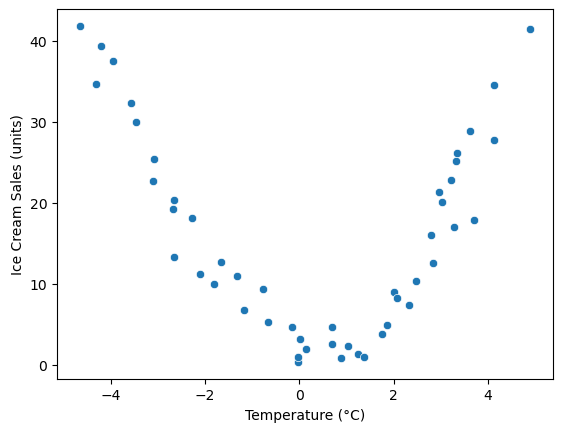

In [10]:
sns.scatterplot(data= data, x=X, y = Y)

In [11]:
X_train = X_train.to_frame()
X_test = X_test.to_frame()

In [12]:
type(X_train)

pandas.core.frame.DataFrame

### Polynomial Features

In [15]:
poly_reg = PolynomialFeatures(degree=2)

In [16]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [47]:
data[:4]

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845


In [13]:
X_train[:4]

,Temperature (°C)
23,0.149245
38,2.959932
43,3.335932
26,0.874905


In [49]:
X_train_poly[:4]

array([[ 1.        ,  0.14924457,  0.02227394],
       [ 1.        ,  2.95993209,  8.76119799],
       [ 1.        ,  3.33593241, 11.12844506],
       [ 1.        ,  0.87490503,  0.76545881]])

In [51]:
X_test_poly

array([[ 1.        , -3.57855372, 12.8060467 ],
       [ 1.        ,  4.13353379, 17.08610158],
       [ 1.        ,  4.13086796, 17.06407011],
       [ 1.        , -1.32637898,  1.75928121],
       [ 1.        , -4.66226268, 21.73669327],
       [ 1.        , -0.77333004,  0.59803936],
       [ 1.        ,  1.35981267,  1.84909051],
       [ 1.        ,  1.85055193,  3.42454243],
       [ 1.        , -0.14963487,  0.02239059],
       [ 1.        , -4.21398476, 17.7576676 ]])

In [53]:
model = LinearRegression( )

In [55]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [58]:
model.score(X_train_poly, y_train)

0.9210787047408692

In [60]:
model.score(X_test_poly, y_test)

0.9434211617529294

In [62]:
train_pred = model.predict(X_train_poly)
test_pred = model.predict(X_test_poly)

In [64]:
mean_absolute_percentage_error(y_train, train_pred)

0.5447295806368749

In [66]:
mean_absolute_percentage_error(y_test, test_pred)

0.6473353670500652

In [76]:
X_2d = X.values.reshape(-1, 1)

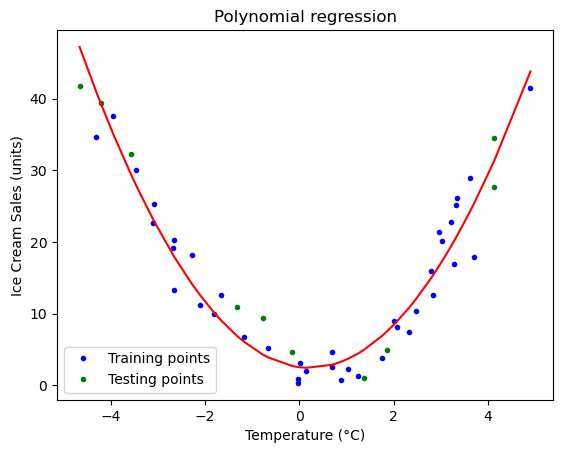

In [78]:
plt.plot(X_train, y_train, "b.",  label = 'Training points')
plt.plot(X_test, y_test, "g.",label = 'Testing points')
plt.plot(X, model.predict(poly_reg.fit_transform(X_2d)), color = "red")
plt.title("Polynomial regression")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()

### Linear Regression

In [89]:
model_lr = LinearRegression()

In [91]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [93]:
model_lr.score(X_train, y_train)

0.005170010223877086

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


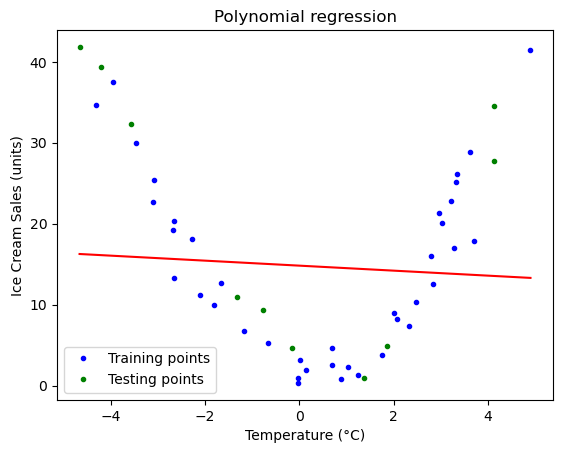

In [95]:
plt.plot(X_train, y_train, "b.",  label = 'Training points')
plt.plot(X_test, y_test, "g.",label = 'Testing points')
plt.plot(X, model_lr.predict(X_2d), color = "red")
plt.title("Polynomial regression")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()

In [99]:
model.coef_

array([ 0.        , -0.80524329,  1.88465827])